In [ ]:
import tensorflow as tf
from tensorflow import keras


fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images / 255.0
test_images  = test_images / 255.0

train_images = tf.reshape(train_images, (60000, 28, 28, 1))
test_images  = tf.reshape(test_images, (10000, 28, 28, 1))

print(train_images.shape)
print(test_images.shape)


# model
model = keras.models.Sequential()

# input is with the shape of (28, 28, 1)
model.add(tf.keras.Input(shape=(28, 28, 1)))

# Convolve with 1 (7x7) kernel 
# Output: (22x22x32)
model.add(keras.layers.Conv2D(32, (7, 7), activation='relu'))

# Convolve with 2 (7x7) kernel 
# Output: (16x16x64)
model.add(keras.layers.Conv2D(64, (7, 7), activation='relu'))

# Convolve with 3 (7x7) kernel 
# Output: (10x10x128)
model.add(keras.layers.Conv2D(128, (7, 7), activation='relu'))

# Convolve with 4 (7x7) kernel 
# Output: (4x4x256)
model.add(keras.layers.Conv2D(256, (7, 7), activation='relu'))

# flatten
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='softmax'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history_data = model.fit(train_images, train_labels, 
                    validation_data=(test_images, test_labels), 
                    batch_size=1024, epochs=150, verbose=2)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 22, 22, 32)        1600      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        100416    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 128)       401536    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 256)         1605888   
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               524416    
_________________________________________________________________
dense_1 (Dense)   

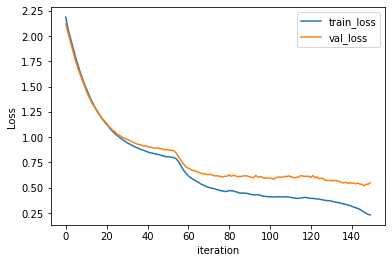

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_data.history['loss'], label = "train_loss")
plt.plot(history_data.history['val_loss'], label = "val_loss")
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

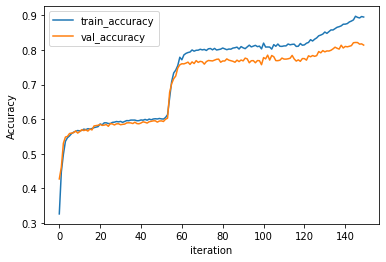

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_data.history['accuracy'], label = "train_accuracy")
plt.plot(history_data.history['val_accuracy'], label = "val_accuracy")
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()